<a href="https://colab.research.google.com/github/lmbd92/DataScienceMonograph/blob/main/Notebooks/Analitica_Descriptiva_Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from google.colab import drive

In [2]:
!gdown '1ChzYRhSgS7ufpUR5qTGF1jIoNt5lM5Rx'

Downloading...
From: https://drive.google.com/uc?id=1ChzYRhSgS7ufpUR5qTGF1jIoNt5lM5Rx
To: /content/DataFinal_Amazon.csv
100% 1.25G/1.25G [00:17<00:00, 73.0MB/s]


# Paso 2: Lectura del Dataset

In [ ]:
df = pd.read_csv('/content/DataFinal_Amazon.csv')

# 3. Exploración inicial:


In [4]:
# Muestra de las primeras filas del DataFrame
display(df)

,overall,reviewerID,asin,reviewText,summary,brand,price,extracted_rank,reviewDate,category
0,3.0,A1BB77SEBQT8VX,B00007GDFV,mother - in - law wanted it as a present for h...,bought as a present,Buxton,16.95,43930,2013-09-22,FASHION
1,3.0,A1BB77SEBQT8VX,B00007GDFV,mother - in - law wanted it as a present for h...,bought as a present,Buxton,16.95,43930,2013-09-22,FASHION
2,3.0,AHWOW7D1ABO9C,B00007GDFV,"Item is of good quality. Looks great, too. But...",Buxton heiress collection,Buxton,16.95,43930,2013-07-17,FASHION
3,3.0,AHWOW7D1ABO9C,B00007GDFV,"Item is of good quality. Looks great, too. But...",Buxton heiress collection,Buxton,16.95,43930,2013-07-17,FASHION
4,3.0,AKS3GULZE0HFC,B00007GDFV,I had used my last el-cheapo fake leather ciga...,Top Clasp Broke Within 3 days!,Buxton,16.95,43930,2013-04-13,FASHION
...,...,...,...,...,...,...,...,...,...,...
4800566,5.0,AGN88YZGOJVTN,B01HJ7J4PI,I love these and comfortable.,Five Stars,Grasshoppers,20.99,1223129,2018-05-16,CLOTHING_SHOES
4800567,4.0,A37UB7JPGWU0CI,B01HJ7J4PI,"cute, comfortable and fun shoes - great for su...",comfortable and fun shoes - great for summer w...,Grasshoppers,20.99,1223129,2018-05-07,CLOTHING_SHOES
4800568,5.0,A1KF8B4FM370C9,B01HJ7J4PI,Very nice semi-dressy shoe.,Five Stars,Grasshoppers,20.99,1223129,2018-03-05,CLOTHING_SHOES
4800569,5.0,AUDTQS1EYBVGL,B01HJ7J4PI,"I love them. Great color, very soft and confor...",Super confortables,Grasshoppers,20.99,1223129,2017-08-09,CLOTHING_SHOES


In [5]:
# Obtener información sobre el conjunto de datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800571 entries, 0 to 4800570
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   overall         float64
 1   reviewerID      object 
 2   asin            object 
 3   reviewText      object 
 4   summary         object 
 5   brand           object 
 6   price           float64
 7   extracted_rank  int64  
 8   reviewDate      object 
 9   category        object 
dtypes: float64(2), int64(1), object(7)
memory usage: 366.3+ MB
None


# 4. Estadísticas descriptivas:

In [6]:
# Estadísticas descriptivas para columnas numéricas
print(df.describe())

            overall         price  extracted_rank
count  4.800571e+06  4.800571e+06    4.800571e+06
mean   4.260527e+00  9.346523e+01    3.631274e+05
std    1.166258e+00  2.293804e+03    7.122776e+05
min    1.000000e+00  1.000000e-02    0.000000e+00
25%    4.000000e+00  9.990000e+00    1.813900e+04
50%    5.000000e+00  1.599000e+01    9.874500e+04
75%    5.000000e+00  2.800000e+01    4.592440e+05
max    5.000000e+00  7.760000e+04    2.707478e+07


# 5. Manejo de Valores Nulos



In [7]:
# Verificar la cantidad de valores nulos por columna
print(df.isnull().sum())

overall                0
reviewerID             0
asin                   0
reviewText             5
summary               27
brand             429942
price                  0
extracted_rank         0
reviewDate             0
category               0
dtype: int64


In [8]:
"""
Eliminar filas con valores nulos, ya que al ser una caracteristica categorica
no sugerimos hacer llenado de la misma mediante técnicas de imputación
"""
df = df.dropna()

In [10]:
# Verificar la cantidad de valores nulos por columna
# luego de aplicar el método dropna()

print(df.isnull().sum())

overall           0
reviewerID        0
asin              0
reviewText        0
summary           0
brand             0
price             0
extracted_rank    0
reviewDate        0
category          0
dtype: int64


# 6. Visualizaciones:


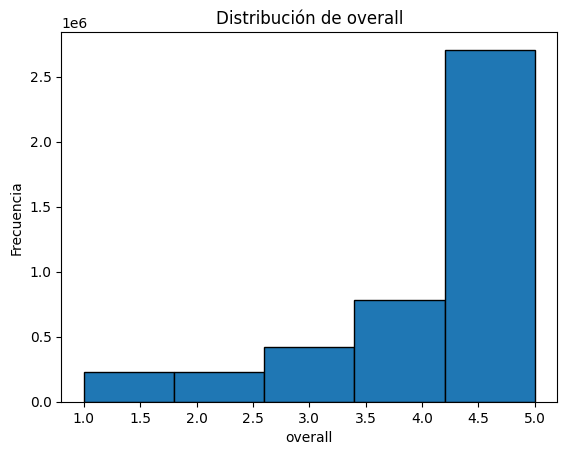

In [11]:
# Histograma para caracteristicas numérica, 'overall'
plt.hist(df['overall'], bins=5, edgecolor='black')
plt.title('Distribución de overall')
plt.xlabel('overall')
plt.ylabel('Frecuencia')
plt.show()

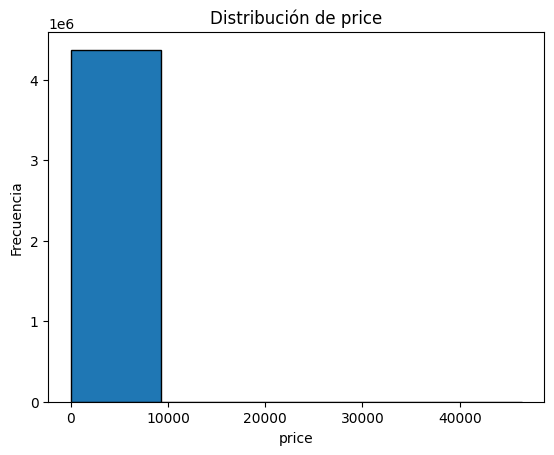

In [17]:
# Histograma para caracteristicas numérica, 'price'
plt.hist(df["price"], bins=5, edgecolor="black")
plt.title("Distribución de price")
plt.xlabel("price")
plt.ylabel("Frecuencia")
plt.show()

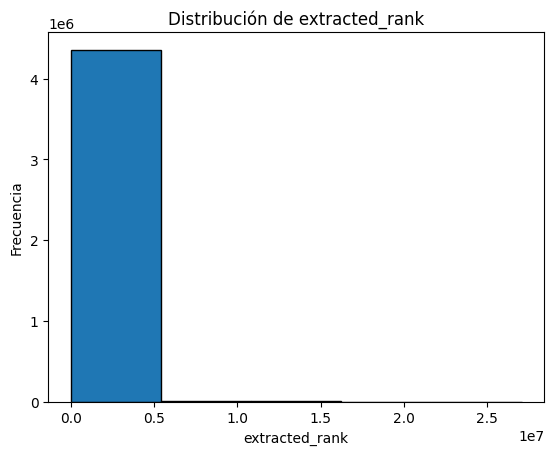

In [18]:
# Histograma para caracteristicas numérica, 'extracted_rank'
plt.hist(df["extracted_rank"], bins=5, edgecolor="black")
plt.title("Distribución de extracted_rank")
plt.xlabel("extracted_rank")
plt.ylabel("Frecuencia")
plt.show()

# 7. Exploración de variables categóricas:


CLOTHING_SHOES    4173783
FASHION            196516
LUXURY_BEAUTY         303
Name: category, dtype: int64


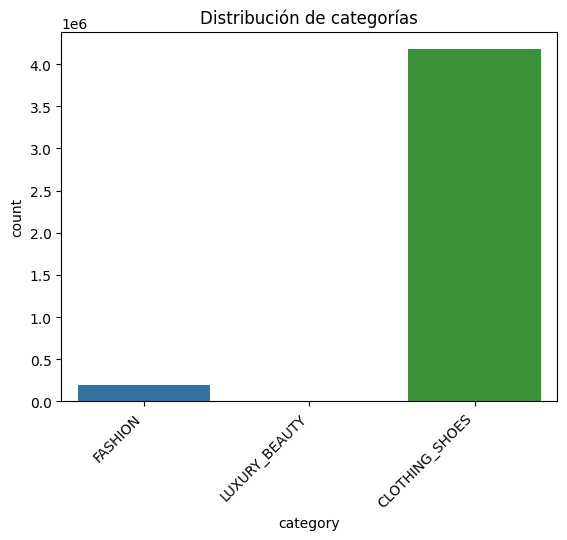

In [19]:
# Conteo de valores únicos en una columna categórica, por ejemplo, 'category'
print(df['category'].value_counts())

# Gráfico de barras para una columna categórica
sns.countplot(x='category', data=df)
plt.title('Distribución de categorías')
plt.xticks(rotation=45, ha='right')
plt.show()

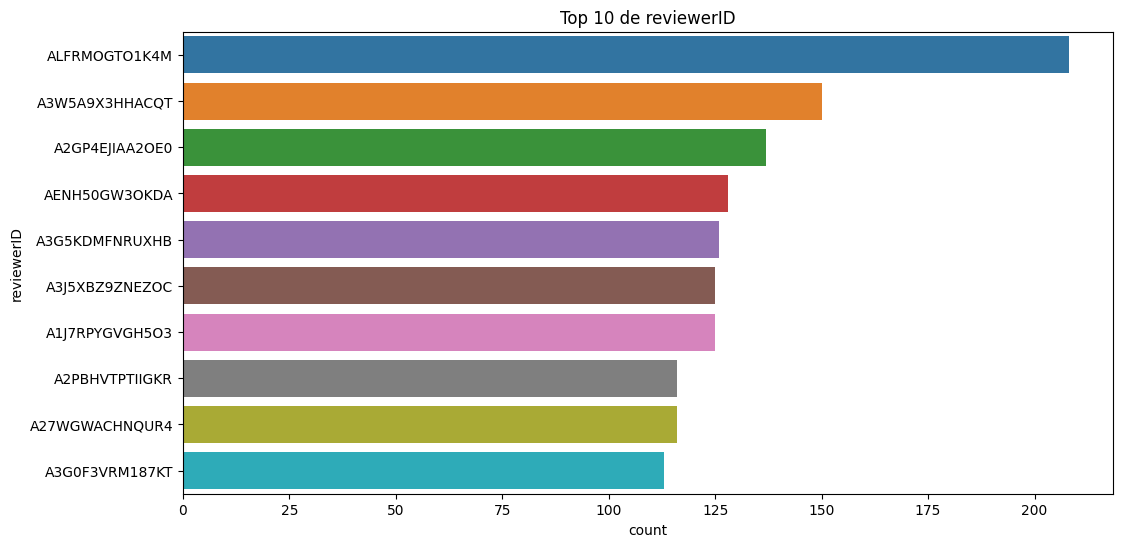

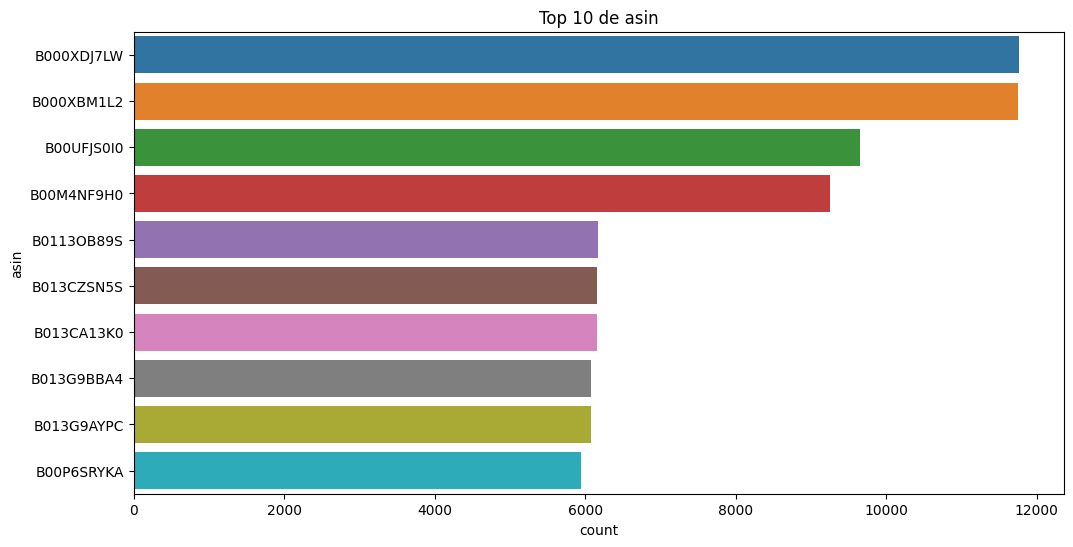

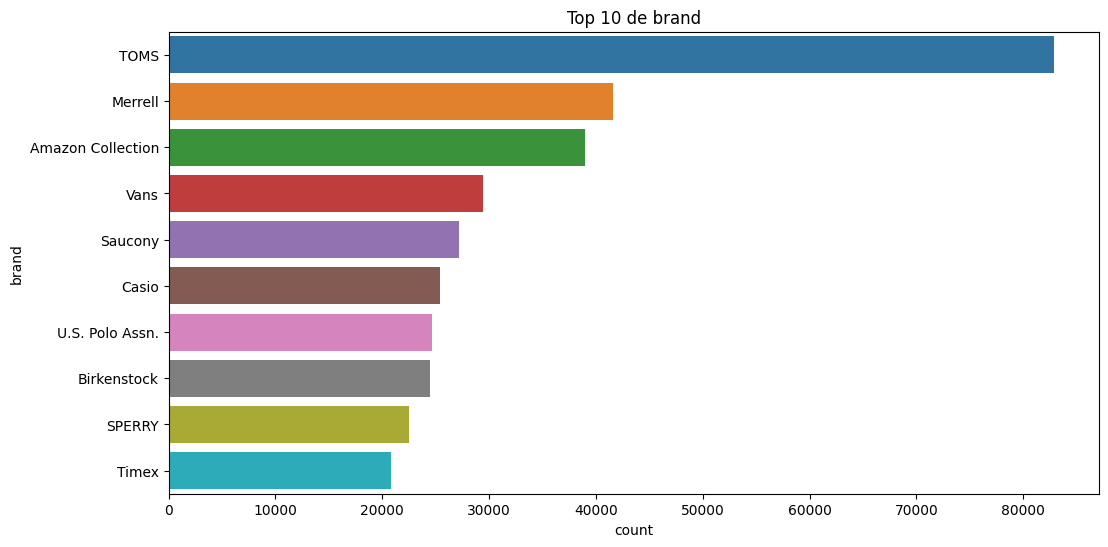

In [20]:
# Análisis de Variables Categóricas
categorical_columns = ['reviewerID', 'asin', 'brand']

for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, y=col, order = df[col].value_counts().index[:10])
    plt.title(f'Top 10 de {col}')
    plt.show()

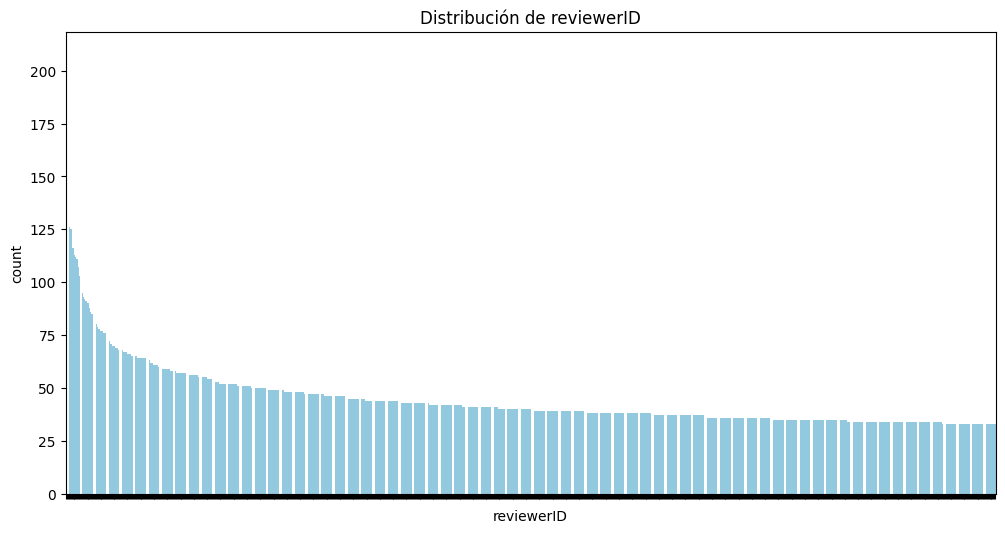

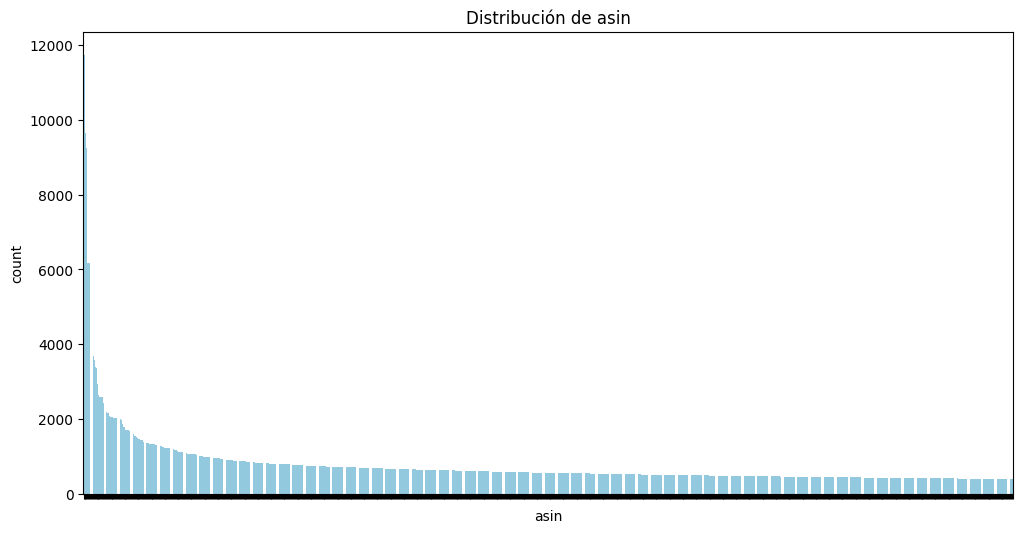

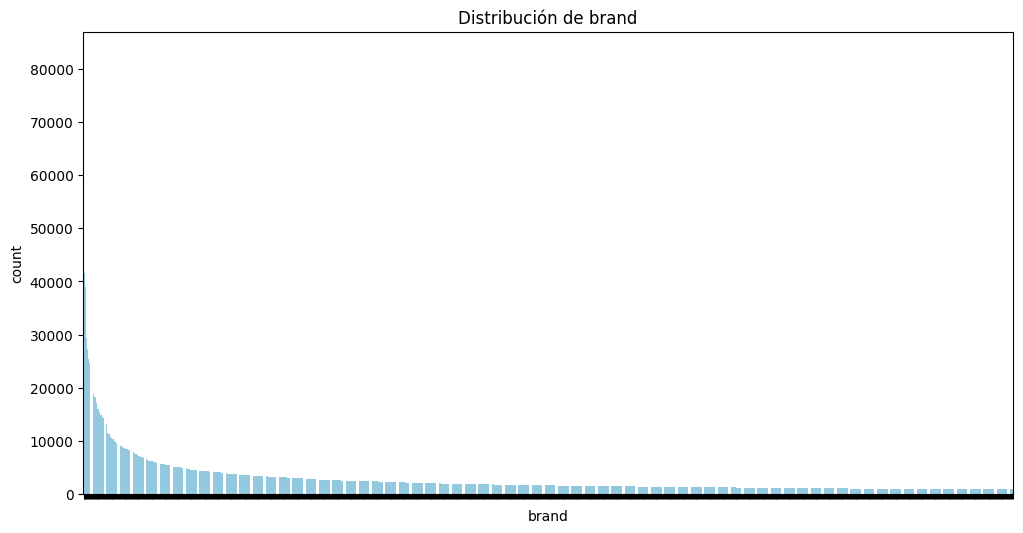

In [ ]:
categorical_columns = ['reviewerID', 'asin', 'brand']

for col in categorical_columns:
    # Calculamos las frecuencias de cada categoría
    freq = df[col].value_counts().reset_index()
    freq.columns = [col, 'count']

    # Tomamos solo las 10 categorías más frecuentes para mejorar la visualización
    top_freq = freq.head(1000)

    # Creamos el barplot
    plt.figure(figsize=(12, 6))
    sns.barplot(data=top_freq, x=col, y='count', color='skyblue')
    plt.title(f'Distribución de {col}')
    plt.gca().set_xticklabels([])  # Esto elimina las etiquetas del eje y
    plt.show()

# 8. Correlaciones:


<ipython-input-12-49311b0124bf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


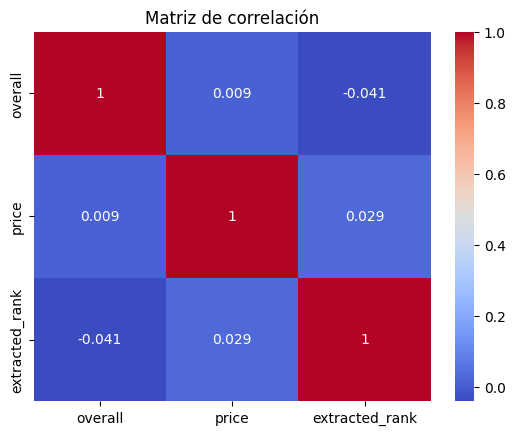

In [ ]:
# Matriz de correlación
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()


# 9. Análisis temporal:


<ipython-input-13-b2d02e3fcc0c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviewDate'] = pd.to_datetime(df['reviewDate'])


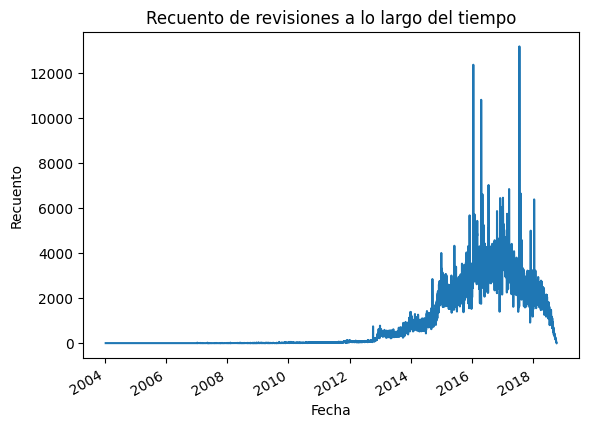

In [ ]:
# Convirtiendo 'reviewDate' a tipo datetime
df['reviewDate'] = pd.to_datetime(df['reviewDate'])

# Gráfico de líneas para el recuento de revisiones a lo largo del tiempo
df['reviewDate'].value_counts().sort_index().plot()
plt.title('Recuento de revisiones a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Recuento')
plt.show()


# 11.Distribución de revisores:


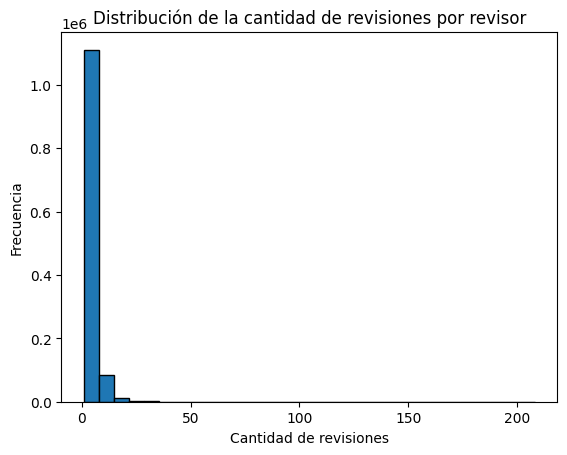

In [ ]:
# Conteo de revisiones por revisor
reviewer_counts = df['reviewerID'].value_counts()

# Histograma para la cantidad de revisiones por revisor
plt.hist(reviewer_counts, bins=30, edgecolor='black')
plt.title('Distribución de la cantidad de revisiones por revisor')
plt.xlabel('Cantidad de revisiones')
plt.ylabel('Frecuencia')
plt.show()

# 12. Comparación de categorías:

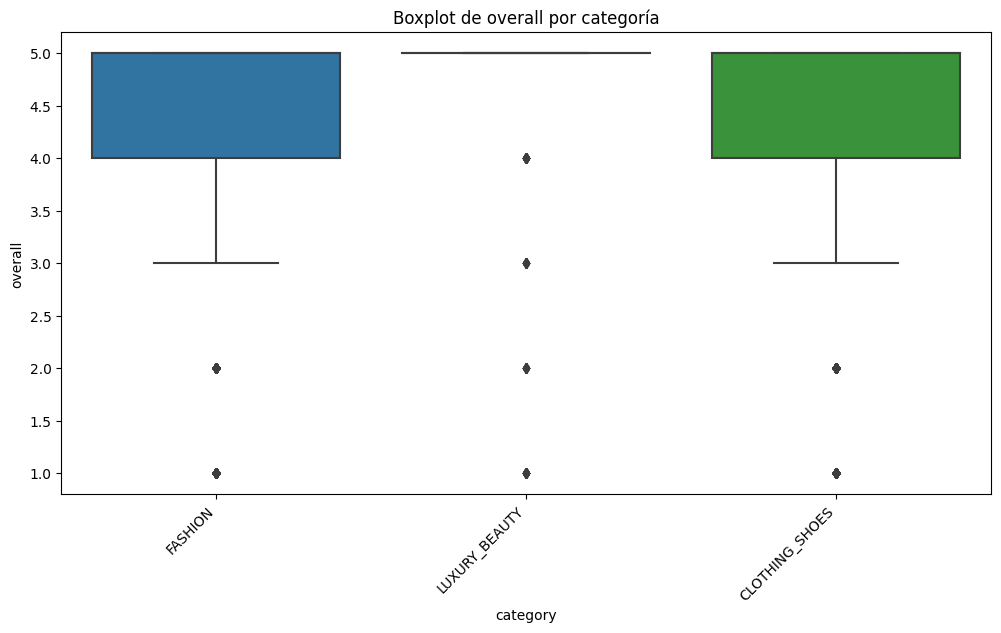

In [ ]:
# Boxplot de overall por categoría
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='overall', data=df)
plt.title('Boxplot de overall por categoría')
plt.xticks(rotation=45, ha='right')
plt.show()

# 13. Análisis de tendencias temporales:

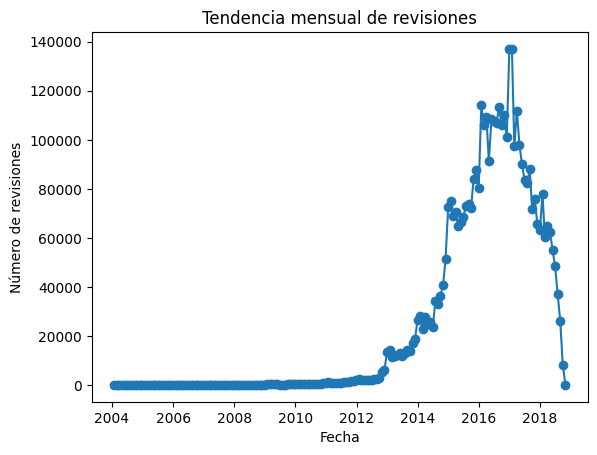

In [ ]:
# Agrupa por mes y cuenta el número de revisiones
monthly_reviews = df.resample('M', on='reviewDate').size()

# Gráfico de líneas para la tendencia mensual de revisiones
plt.plot(monthly_reviews.index, monthly_reviews.values, marker='o')
plt.title('Tendencia mensual de revisiones')
plt.xlabel('Fecha')
plt.ylabel('Número de revisiones')
plt.show()

# 14. Análisis de Texto: WordClouds para 'reviewText' y 'summary'


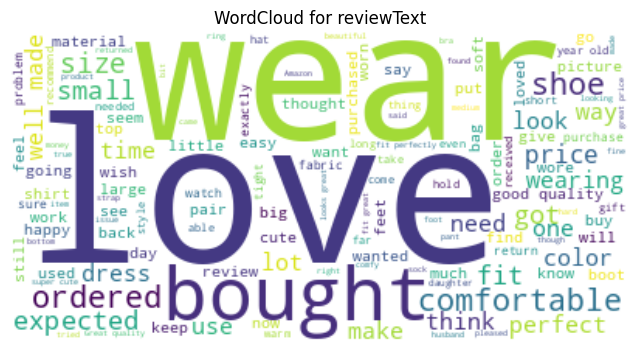

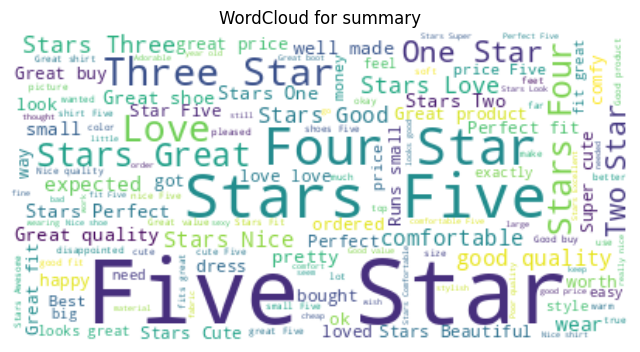

In [ ]:
from wordcloud import WordCloud

text_columns = ['reviewText', 'summary']

for col in text_columns:
    text_data = " ".join(review for review in df[col].dropna())
    wordcloud = WordCloud(background_color='white').generate(text_data)

    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {col}')
    plt.show()